#### Математическая морфология

**Морфология** – описание свойств формы и структуры объектов. В контексте машинного зрения – описание свойств формы областей на изображении. 
**Математическая морфология** (ММ) – теория и техника анализа и обработки геометрических структур, основанная на теории множеств, топологии и случайных функциях. Множества в ММ – объекты на изображени.
Входные данные для ММ:
1. Обрабатываемое изображение.
2. Специальное изображение (примитив, структурный элемент). Зависит от вида операций и задачи. Структурный элемент меньше обрабатываемого изображение. Виды структурных элементов: прямоугольник, диск и кольцо заданных размеров.

Морфологические операции: объединение, пересечение, дополнение, разность, перенос, наращивание, эрозия, замыкание и размыкание.

In [1]:
from skimage.io import imread, imshow
from skimage.morphology import binary_erosion, binary_dilation, binary_opening, binary_closing, disk, rectangle, square, erosion, dilation
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import rank
from skimage import img_as_float, img_as_ubyte

#### Удаление шума и поиск внутренних и внешних границ изображений №1-3

In [7]:
img_1 = imread('bin_images/1.png')
img_2 = imread('bin_images/2.png')
img_3 = imread('bin_images/3.png')

#imshow(img_1);
#imshow(img_2);
#imshow(img_3);

Из изображения №1 видно, что необходимо сократить светлые области, которые и составляют шум, и расширить темные. Поэтому использована эрозия.

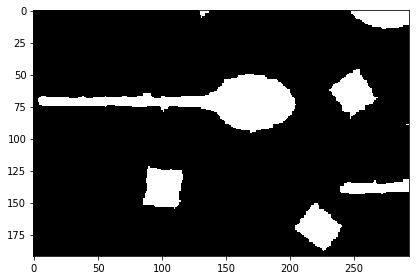

In [9]:
img_1 = rgb2gray(img_1)
img_1_noiseless = erosion(img_1, selem=square(6)) # структурный элемент – квадрат 6*6
imshow(img_1_noiseless);

На изображении №2 светлая области разделена шумом. Поэтому необходимо применение дилатации для расшрение светлых областей.

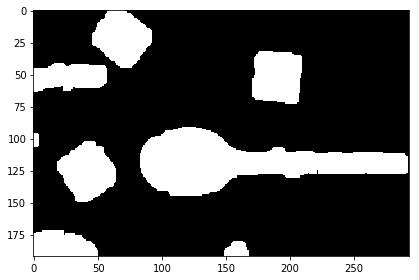

In [10]:
img_2 = rgb2gray(img_2)
img_2_noiseless = dilation(img_2, selem=square(6)) # структурный элемент – квадрат 6*6
imshow(img_2_noiseless);

Изображение №3 содержит шум, аналогичный шуму на изображении №1.

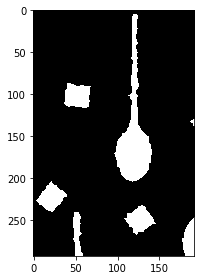

In [11]:
img_3 = rgb2gray(img_3)
img_3_noiseless = erosion(img_3, selem=square(5)) # структурный элемент – квадрат 4*4
imshow(img_3_noiseless);

#### Поиск границ

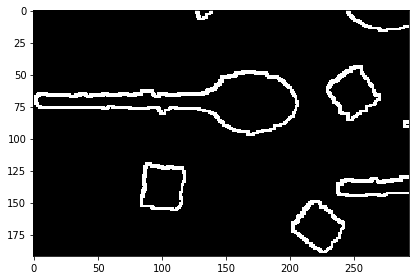

In [12]:
img_1_border = dilation(img_1_noiseless, selem=square(6)) - img_1_noiseless
imshow(img_1_border, cmap=plt.cm.gray);

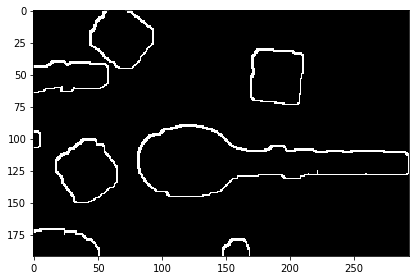

In [13]:
img_2_border = dilation(img_2_noiseless, selem=square(4)) - img_2_noiseless
imshow(img_2_border, cmap=plt.cm.gray);

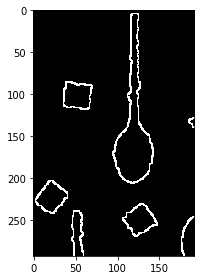

In [14]:
img_3_border = dilation(img_3_noiseless, selem=square(5)) - img_3_noiseless
imshow(img_3_border, cmap=plt.cm.gray);

####  Удаление шума с изображений № 4-6

In [18]:
img_4 = imread('bin_images/4.png')
img_5 = imread('bin_images/5.png')
img_6 = imread('bin_images/6.jpg')

#imshow(img_4);
#imshow(img_5);
#imshow(img_6);

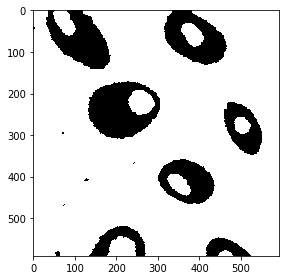

In [19]:
img_4 = rgb2gray(img_4)
img_4_erosion = erosion(img_4, selem=disk(3))
img_4_noiseless = dilation(img_4_erosion, selem=disk(8))
imshow(img_4_noiseless);

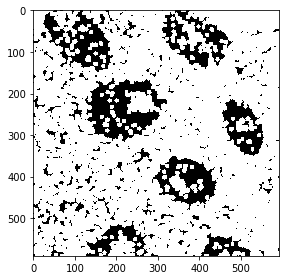

In [20]:
img_5 = rgb2gray(img_5)
img_5_erosion = erosion(img_5, selem=disk(2))
img_5_noiseless = dilation(img_5_erosion, selem=disk(5))
imshow(img_5_noiseless);

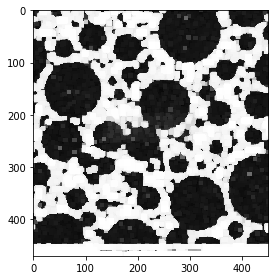

In [21]:
img_6 = rgb2gray(img_6)
img_6_erosion = erosion(img_6, selem=disk(2))
img_6_noiseless = dilation(img_6_erosion, selem=square(8))
imshow(img_6_noiseless);

#### 3. Удаление шума с № 7-9

In [29]:
img_7 = imread('bin_images/7.png')
img_8 = imread('bin_images/8.png')
img_9 = imread('bin_images/9.png')

#imshow(img_7);
#imshow(img_8);
#imshow(img_9);

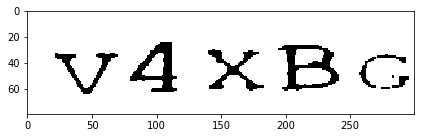

In [30]:
img_7 = rgb2gray(img_7)
img_7_captcha = img_7[120:200, 150:450] # выбор области изображения с капчей
img_7_threshold = img_7_captcha > 0.65 # определение порога интенсивности пикселей
img_7_dilation = dilation(img_7_threshold, selem=square(4)) # увеличение светлых областей
img_7_noiseless = erosion(img_7_dilation, selem=square(2)) # увел. темных областей
imshow(img_7_noiseless);

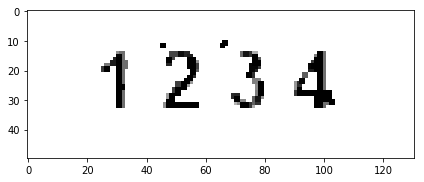

In [31]:
img_8_captcha = rgb2gray(img_8)
img_8_dilation = dilation(img_8_captcha, selem=square(3)) 
img_8_noiseless = erosion(img_8_dilation, selem=square(2))
imshow(img_8_noiseless);

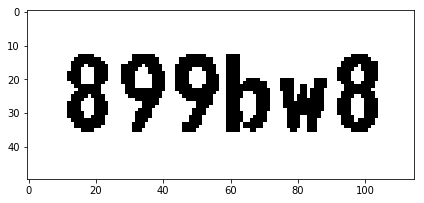

In [32]:
img_9 = rgb2gray(img_9)
img_9_captcha = img_9[0:50, 5:120]
img_9_dilation = dilation(img_9_captcha > 0.4, selem=square(2)) 
img_9_noiseless = erosion(img_9_dilation, selem=square(2))
imshow(img_9_noiseless);

#### 4. Определение возраста дерева по спилу
Количество колец на срезе дерева указывает на то, сколько лет оно прожило. Кольца видны в виде чередующихся более темных и светлых полос. Один год жизни дерева соответствует одной светлой и темной полосе

In [36]:
img_11 = imread('bin_images/11.jpg')
#imshow(img_11);

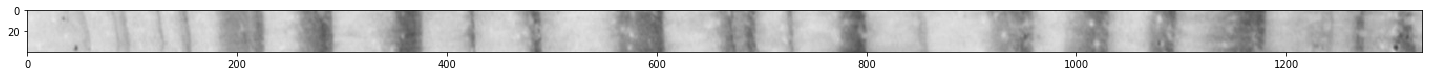

In [38]:
img_11 = rgb2gray(img_11)
plt.figure(figsize=(20, 20))
img_11_line = img_11[1600:1640, 1670:3000]
imshow(img_11_line);

Выравнивание гистограммы изображения для повышения контрастности и определение пороговой интенсивности пикселей.

/usr/local/lib/python3.7/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


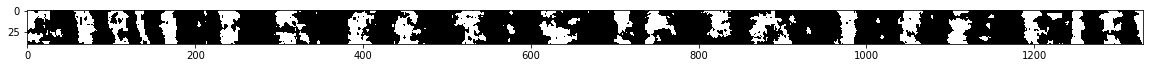

In [39]:
plt.figure(figsize=(20, 20))
img_11_line_eq = rank.equalize(img_11_line, selem=disk(30))
img_11_line_eq = img_11_line_eq > 173
plt.imshow(img_11_line_eq, cmap=plt.cm.gray);

Выполнение операции дилатации изображения для увеличения и объединения светлых областей, разделенных шумами.

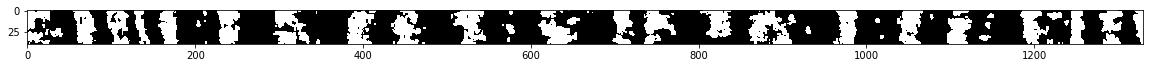

In [40]:
img_11_line_dilation = dilation(img_11_line_eq, square(2))
plt.figure(figsize=(20, 20))
plt.imshow(img_11_line_dilation, cmap=plt.cm.gray);

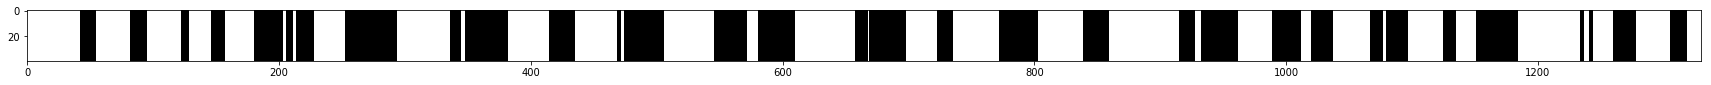

In [41]:
rings_mean = np.mean(img_11_line_dilation, axis = 0)
rings_mean_erosion = binary_erosion(rings_mean) # крест - дефолтный параметр
rings = img_as_float(rings_mean_erosion) # переведем булевый тип в float (False = 0, True = 1)

plt.figure(figsize=(30, 30))
plt.imshow([rings]*40, cmap=plt.cm.gray); # '*40' только для отрисовки результата

Подсчет кол-ва колец.

In [42]:
ring_count = 0
for i in range(0, len(rings)-1):
    # если черный пиксель идет следом за светлым, то это – один год жизни дерева
    if (rings[i] == 1 and rings[i + 1] == 0):
        ring_count += 1

In [43]:
print("Дереву {} года ({} темных кольца).". format(ring_count, ring_count))

Дереву 32 года (32 темных кольца).
